## CONTENTS:

1. INTRODUCTION


2. VARIANTS (LINEAGES) ANALYSIS


3. VACCINATIONS ANALYSIS


4. CASES ANALYSIS


5. DEATHS ANALYSIS


6.  MERGING VARIANTS, VACCINATIONS, CASES AND DEATHS


7. FINAL ANALYSIS


8. CONCLUSION

## 1. INTRODUCTION

The goal of this project is to analyze England's Covid-19 status as of 6 Jul, 2021 using Exploratory Data Analysis, Feature Engineering techniques and Time Series Analysis. The project will not go further and develop any of the Machine Learning models. 

Covid-19 patterns among Variants, Vaccinations, Deaths and Cases in general from the start of the pandemic (first registered case in England) will be revealed. Alpha and Delta Variants will be heavily observed.

Some intuitive predictions for the nearest future regarding the course of the pandemic will be given by the end of the analysis.

Cumulative raw data for the UK has been obtained from multiple reliable sources provided by COVID-19 Genomics UK (COG-UK) consortium and the UK Coronavirus Dashboard:

https://www.cogconsortium.uk/tools-analysis/public-data-analysis-2/

https://coronavirus.data.gov.uk

The resources provided by Public Health England (PHE) on Covid-19 have also been taken advantage of.

In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib
from matplotlib import ticker
import numpy as np

In [2]:
os.getcwd() # Check current directory 

'/Users/aisalkynabdyvalieva/ENGLAND COVID-19 DATA ANALYSIS '



## 2. VARIANTS (LINEAGES) ANALYSIS



In [3]:
df_1 = pd.concat(map(pd.read_csv, glob.glob(os.path.join('UK VARIANTS RAW CUMULATIVE DATASETS', "*.csv"))))
df_1

,sequence_name,sample_date,epi_week,epi_date,lineage
0,England/MILK-172D276/2021,2021-06-18,77,2021-06-13,C.37
1,England/MILK-1647769/2021,2021-06-07,76,2021-06-06,C.37
2,England/MILK-156082C/2021,2021-05-06,71,2021-05-02,C.37
3,England/CAMC-149B04F/2021,2021-03-30,66,2021-03-28,C.37
4,England/CAMC-13962F4/2021,2021-03-04,62,2021-02-28,C.37
...,...,...,...,...,...
504,England/CAMC-1395FC1/2021,2021-03-02,62,2021-02-28,B.1.617.1
505,England/CAMC-133CCF2/2021,2021-02-26,61,2021-02-21,B.1.617.1
506,England/CAMC-133CE0B/2021,2021-02-26,61,2021-02-21,B.1.617.1
507,England/CAMC-1322D74/2021,2021-02-22,61,2021-02-21,B.1.617.1


We concatenate 20 datasets into one to do our Variants (Lineages) analysis. Each dataset contains Cumulative data on Sequences corresponding to a certain Variant (Lineage) for the UK. The number of Sequences is not equal to the number of Cases as the data has already been deduplicated by the "COG-UK (COVID-19 Genomics UK Consortium) Mutation Explorer" team. The datasets were downloaded from the "COG-UK Mutation Explorer" dating Jul 6, 2021. 

We see that datasets have been concatenated based on the 'lineage' column starting from C.37 lineage and ending with B.1.617.1 lineage.

Deduplication refers to a technique for eliminating redundant data in a data set. Indeed, as we will see further in the analysis the Cumulative number of Cases for England only is over 4 million. Hence, deduplication is an important step which can actually significantly save money in terms of storage costs and backup speed - in some cases, up to 50 percent.

In [4]:
# Another way of concatenating multiple .csv files is as follows:

# path = '/Users/aisalkynabdyvalieva/BUTUNLEME/UK VARIANTS RAW CUMULATIVE DATASETS' # define the path to the directory containing .csv files
# os.chdir(path) # change the current directory to the path
# os.getcwd() # check for the current directory
# filepaths = [f for f in os.listdir('.') if f.endswith('.csv')] # no need for glob 
# df = pd.concat(map(pd.read_csv, filepaths))

# Refer to https://www.tutorialspoint.com/python/os_listdir.htm 
# Refer to https://www.journaldev.com/30205/python-os-library-functions 
# Refer to https://stackoverflow.com/a/51118604/15934571 

In [5]:
df_1[100630:100637]

,sequence_name,sample_date,epi_week,epi_date,lineage
99475,England/QEUH-13DF5F6/2021,2021-03-13,63,2021-03-07,B.1.1.7
99476,England/QEUH-13E3568/2021,2021-03-13,63,2021-03-07,B.1.1.7
99477,Scotland/QEUH-13E36ED/2021,2021-03-13,63,2021-03-07,B.1.1.7
99478,Scotland/QEUH-13DD464/2021,2021-03-13,63,2021-03-07,B.1.1.7
99479,England/QEUH-13DF59C/2021,2021-03-13,63,2021-03-07,B.1.1.7
99480,Scotland/QEUH-13DD73E/2021,2021-03-13,63,2021-03-07,B.1.1.7
99481,England/QEUH-13DF8FD/2021,2021-03-13,63,2021-03-07,B.1.1.7


In [6]:
df_1.isnull().any()

sequence_name    False
sample_date      False
epi_week         False
epi_date         False
lineage          False
dtype: bool

There is no any null data in the concatenated dataset. 

In [7]:
england_variants = df_1[df_1['sequence_name'].str.contains('England')]
england_variants

,sequence_name,sample_date,epi_week,epi_date,lineage
0,England/MILK-172D276/2021,2021-06-18,77,2021-06-13,C.37
1,England/MILK-1647769/2021,2021-06-07,76,2021-06-06,C.37
2,England/MILK-156082C/2021,2021-05-06,71,2021-05-02,C.37
3,England/CAMC-149B04F/2021,2021-03-30,66,2021-03-28,C.37
4,England/CAMC-13962F4/2021,2021-03-04,62,2021-02-28,C.37
...,...,...,...,...,...
504,England/CAMC-1395FC1/2021,2021-03-02,62,2021-02-28,B.1.617.1
505,England/CAMC-133CCF2/2021,2021-02-26,61,2021-02-21,B.1.617.1
506,England/CAMC-133CE0B/2021,2021-02-26,61,2021-02-21,B.1.617.1
507,England/CAMC-1322D74/2021,2021-02-22,61,2021-02-21,B.1.617.1


The concatenated dataset represents the UK data, so we extract only rows corresponding to England. As a result, we obtain a total of 321,571 Sequences for England as of Jul 6, 2021.

In [8]:
england_variants.shape

(321571, 5)

In [9]:
england_variants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321571 entries, 0 to 508
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   sequence_name  321571 non-null  object
 1   sample_date    321571 non-null  object
 2   epi_week       321571 non-null  object
 3   epi_date       321571 non-null  object
 4   lineage        321571 non-null  object
dtypes: object(5)
memory usage: 14.7+ MB


In [10]:
lineage_count = england_variants['lineage'].value_counts()
print(lineage_count)
len(lineage_count)

B.1.1.7      222430
B.1.617.2     96309
B.1.351         718
B.1.617.1       458
B.1.525         457
B.1.1.318       321
AV.1            180
P.1             178
A.23.1          168
C.36.3          140
P.2              52
AY.1             49
B.1.526          41
B.1.1.28         20
A.27             19
B.1.617.3        16
P.3               7
C.37              6
B.1.324.1         2
Name: lineage, dtype: int64


19

While we have concatenated 20 datasets each corresponding to a certain Variant (Lineage), we obtain value counts for only 19 unique Lineages. After inspection, we reveal that the B.1.429 Lineage does not have any entries. 

As expected, Alpha Variant (B.1.1.7 Lineage) has the highest count, followed by Delta Variant (B.1.617.2 Lineage).

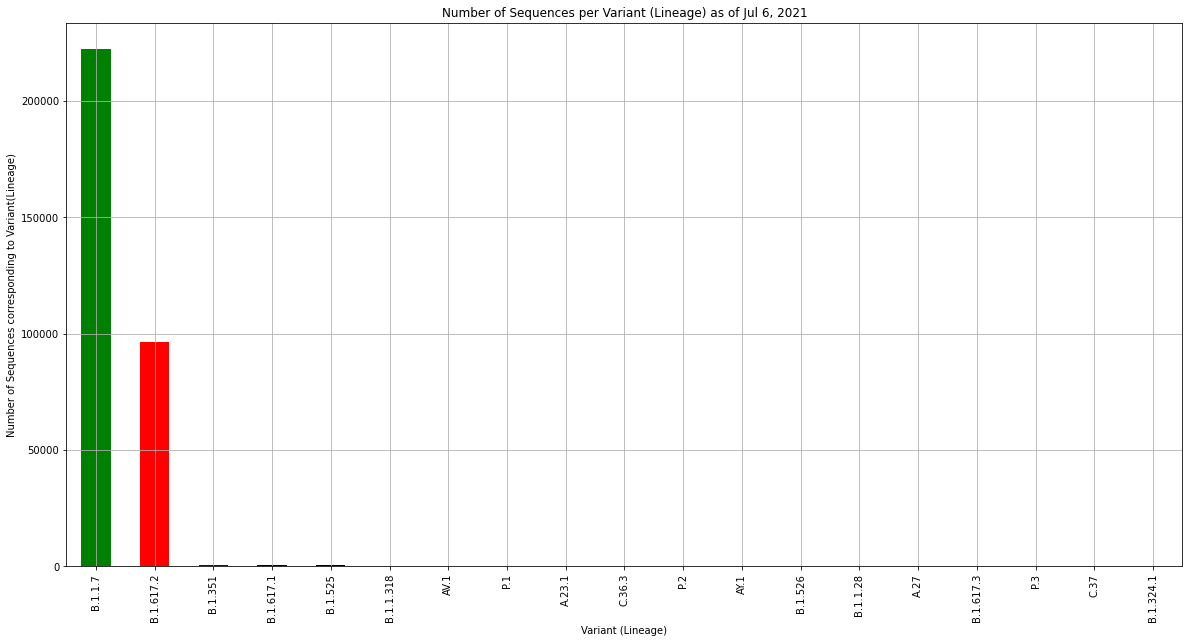

In [11]:
from itertools import cycle, islice
my_colors = list(islice(cycle(['g', 'r', 'b', 'k', 'k', 'b', 'r', 'g', 'y', 'k', 'b', 'r', 'g', 'y', 'k', 'b', 'r', 'g', 'y' ]), None, len(lineage_count)))
lineage_count.plot(kind='bar', figsize = (20,10), ylabel='Number of Sequences corresponding to Variant(Lineage)', xlabel='Variant (Lineage)', title = 'Number of Sequences per Variant (Lineage) as of Jul 6, 2021', color=my_colors)
plt.grid()

The bar plot shows how insignificant the rest of the Variants (Lineages) are when compared to Alpha and Delta. So, for the sake of simplifying our analysis we will focus on Alpha Variant (B.1.1.7 Lineage) and Delta Variant (B.1.617.2 Lineage) only.

In [12]:
date_count = england_variants['sample_date'].value_counts()
print(date_count)
print(len(date_count))

2021-06-29    4041
2021-06-07    3820
2021-06-08    3347
2021-06-22    3248
2021-06-26    3241
              ... 
2020-06-14       1
2020-10-25       1
2020-10-09       1
2020-09-04       1
2020-10-08       1
Name: sample_date, Length: 276, dtype: int64
276


We have 276 distinct dates. For the same date we can have multiple Sequences with each Sequence corresponding to a certain Variant. 

In [13]:
england_variants['sample_date']= pd.to_datetime(england_variants['sample_date'])
england_variants.dtypes

<ipython-input-13-3a9d757b2045>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  england_variants['sample_date']= pd.to_datetime(england_variants['sample_date'])


sequence_name            object
sample_date      datetime64[ns]
epi_week                 object
epi_date                 object
lineage                  object
dtype: object

The 'sample_date' column is now properly formatted.

In [14]:
england_variants = england_variants.sort_values(by='sample_date')
england_variants

,sequence_name,sample_date,epi_week,epi_date,lineage
268826,England/LOND-12F6624/2020,2020-06-14,25,2020-06-14,B.1.1.7
20,England/ALDP-91629F/2020,2020-06-22,26,2020-06-21,B.1.1.28
19,England/MILK-99D597/2020,2020-08-30,36,2020-08-30,B.1.1.28
18,England/QEUH-9B7A6B/2020,2020-09-03,36,2020-08-30,B.1.1.28
17,England/QEUH-9B7A5C/2020,2020-09-04,36,2020-08-30,B.1.1.28
...,...,...,...,...,...
9,England/PHEC-3300C8/2021,2021-07-04,80,2021-07-04,B.1.617.2
2,England/PHEC-3300AA/2021,2021-07-04,80,2021-07-04,B.1.1.7
8,England/PHEC-3300B9/2021,2021-07-04,80,2021-07-04,B.1.617.2
1,England/PLYM-182ED55/2021,2021-07-05,80,2021-07-04,B.1.617.2


In [15]:
england_variants = england_variants.set_index('sample_date')
england_variants.head(5)

,sequence_name,epi_week,epi_date,lineage
sample_date,,,,
2020-06-14,England/LOND-12F6624/2020,25,2020-06-14,B.1.1.7
2020-06-22,England/ALDP-91629F/2020,26,2020-06-21,B.1.1.28
2020-08-30,England/MILK-99D597/2020,36,2020-08-30,B.1.1.28
2020-09-03,England/QEUH-9B7A6B/2020,36,2020-08-30,B.1.1.28
2020-09-04,England/QEUH-9B7A5C/2020,36,2020-08-30,B.1.1.28


In [16]:
england_variants.tail(5)

,sequence_name,epi_week,epi_date,lineage
sample_date,,,,
2021-07-04,England/PHEC-3300C8/2021,80,2021-07-04,B.1.617.2
2021-07-04,England/PHEC-3300AA/2021,80,2021-07-04,B.1.1.7
2021-07-04,England/PHEC-3300B9/2021,80,2021-07-04,B.1.617.2
2021-07-05,England/PLYM-182ED55/2021,80,2021-07-04,B.1.617.2
2021-07-06,England/PHEC-32F572/2021,80,2021-07-04,B.1.617.2


In [17]:
england_variants.index

DatetimeIndex(['2020-06-14', '2020-06-22', '2020-08-30', '2020-09-03',
               '2020-09-04', '2020-09-20', '2020-09-21', '2020-09-23',
               '2020-09-30', '2020-09-30',
               ...
               '2021-07-04', '2021-07-04', '2021-07-04', '2021-07-04',
               '2021-07-04', '2021-07-04', '2021-07-04', '2021-07-04',
               '2021-07-05', '2021-07-06'],
              dtype='datetime64[ns]', name='sample_date', length=321571, freq=None)

We will be doing our analysis using Time Series. So, we set the 'sample_date' column as an index. 

In [18]:
print (england_variants.index.min())
print (england_variants.index.max())

2020-06-14 00:00:00
2021-07-06 00:00:00


In [19]:
print(england_variants.loc['2020-06-14'])
print(england_variants.loc['2021-07-06'])

sequence_name    England/LOND-12F6624/2020
epi_week                                25
epi_date                        2020-06-14
lineage                            B.1.1.7
Name: 2020-06-14 00:00:00, dtype: object
sequence_name    England/PHEC-32F572/2021
epi_week                               80
epi_date                       2021-07-04
lineage                         B.1.617.2
Name: 2021-07-06 00:00:00, dtype: object


Our dataset on Variants registered in England starts on 2020-06-14 with 1 Alpha Variant (B.1.1.7 Lineage) Sequence detected for that date. This is interesting because according to the official sources, first Alpha Variant case has originated in the UK, and was detected in November following its quick spread by mid-December, hence the designation "VOC-20DEC-01" by PHE (Public Health England). But according to our data obtained from COG-UK, we conclude that Alpha Variant has actually emerged in June 2020. 

The last date of the dataset is 2021-07-06 with 1 Delta Variant (B.1.617.2 Lineage) Sequence detected for that date.

Remember that the number of Cases is not equal to the number of Sequences for that date as data has been deduplicated. 

In [20]:
england_variants.loc['2021-01-03']

,sequence_name,epi_week,epi_date,lineage
sample_date,,,,
2021-01-03,England/MILK-EC0A97/2021,54,2021-01-03,B.1.1.7
2021-01-03,England/MILK-EC04F3/2021,54,2021-01-03,B.1.1.7
2021-01-03,England/MILK-EC0745/2021,54,2021-01-03,B.1.1.7
2021-01-03,England/MILK-EC06C0/2021,54,2021-01-03,B.1.1.7
2021-01-03,England/MILK-EC1753/2021,54,2021-01-03,B.1.1.7
...,...,...,...,...
2021-01-03,England/PHEC-152842/2021,54,2021-01-03,B.1.1.7
2021-01-03,England/CAMB-A9A46F/2021,54,2021-01-03,B.1.1.7
2021-01-03,England/CAMB-A9A380/2021,54,2021-01-03,B.1.1.7


In [21]:
england_variants.loc['2021-06-07']

,sequence_name,epi_week,epi_date,lineage
sample_date,,,,
2021-06-07,England/ALDP-166DFED/2021,76,2021-06-06,B.1.617.2
2021-06-07,England/ALDP-166E25C/2021,76,2021-06-06,B.1.617.2
2021-06-07,England/ALDP-166DE3B/2021,76,2021-06-06,B.1.617.2
2021-06-07,England/ALDP-166E08F/2021,76,2021-06-06,B.1.617.2
2021-06-07,England/ALDP-166E113/2021,76,2021-06-06,B.1.617.2
...,...,...,...,...
2021-06-07,England/MILK-1646ADA/2021,76,2021-06-06,B.1.617.2
2021-06-07,England/PLYM-16467A6/2021,76,2021-06-06,B.1.617.2
2021-06-07,England/MILK-1646C89/2021,76,2021-06-06,B.1.617.2


In [22]:
england_variants.loc['2021-06-06']

,sequence_name,epi_week,epi_date,lineage
sample_date,,,,
2021-06-06,England/ALDP-1661EA0/2021,76,2021-06-06,B.1.617.2
2021-06-06,England/ALDP-1661DC1/2021,76,2021-06-06,B.1.617.2
2021-06-06,England/ALDP-1661BB8/2021,76,2021-06-06,B.1.617.2
2021-06-06,England/ALDP-1661DD0/2021,76,2021-06-06,B.1.617.2
2021-06-06,England/ALDP-166204F/2021,76,2021-06-06,B.1.617.2
...,...,...,...,...
2021-06-06,England/PHEC-31920B/2021,76,2021-06-06,B.1.617.2
2021-06-06,England/PHEC-31906B/2021,76,2021-06-06,B.1.617.2
2021-06-06,England/PHEC-3192FC/2021,76,2021-06-06,B.1.617.2


In [23]:
england_variants.loc['2021-06-29']

,sequence_name,epi_week,epi_date,lineage
sample_date,,,,
2021-06-29,England/MILK-17FEF68/2021,79,2021-06-27,B.1.617.2
2021-06-29,England/NORT-1BDCB77/2021,79,2021-06-27,B.1.617.2
2021-06-29,England/NORT-1BDBF9A/2021,79,2021-06-27,B.1.617.2
2021-06-29,England/NORT-1BDC1EE/2021,79,2021-06-27,B.1.617.2
2021-06-29,England/NORT-1BDCC0B/2021,79,2021-06-27,B.1.617.2
...,...,...,...,...
2021-06-29,England/MILK-1830C71/2021,79,2021-06-27,B.1.617.2
2021-06-29,England/MILK-1830F78/2021,79,2021-06-27,B.1.617.2
2021-06-29,England/MILK-1830E6C/2021,79,2021-06-27,B.1.617.2


In [24]:
england_variants_sample = england_variants.loc['2021-06-29']
lineage_count_1 = england_variants_sample ['lineage'].value_counts()
lineage_count_1

B.1.617.2    4023
B.1.1.7        18
Name: lineage, dtype: int64

In [25]:
england_variants['Year'] = england_variants.index.year
england_variants['Month'] = england_variants.index.month_name()
england_variants['Week'] = england_variants.index.isocalendar().week
england_variants.head(5)

,sequence_name,epi_week,epi_date,lineage,Year,Month,Week
sample_date,,,,,,,
2020-06-14,England/LOND-12F6624/2020,25,2020-06-14,B.1.1.7,2020,June,24
2020-06-22,England/ALDP-91629F/2020,26,2020-06-21,B.1.1.28,2020,June,26
2020-08-30,England/MILK-99D597/2020,36,2020-08-30,B.1.1.28,2020,August,35
2020-09-03,England/QEUH-9B7A6B/2020,36,2020-08-30,B.1.1.28,2020,September,36
2020-09-04,England/QEUH-9B7A5C/2020,36,2020-08-30,B.1.1.28,2020,September,36


In [26]:
england_variants.tail(5)

,sequence_name,epi_week,epi_date,lineage,Year,Month,Week
sample_date,,,,,,,
2021-07-04,England/PHEC-3300C8/2021,80,2021-07-04,B.1.617.2,2021,July,26
2021-07-04,England/PHEC-3300AA/2021,80,2021-07-04,B.1.1.7,2021,July,26
2021-07-04,England/PHEC-3300B9/2021,80,2021-07-04,B.1.617.2,2021,July,26
2021-07-05,England/PLYM-182ED55/2021,80,2021-07-04,B.1.617.2,2021,July,27
2021-07-06,England/PHEC-32F572/2021,80,2021-07-04,B.1.617.2,2021,July,27


In [27]:
england_variants_pivotted = england_variants.pivot_table(index='sample_date', columns='lineage', aggfunc='size', fill_value=0)
england_variants_pivotted

lineage,A.23.1,A.27,AV.1,AY.1,B.1.1.28,B.1.1.318,B.1.1.7,B.1.324.1,B.1.351,B.1.525,B.1.526,B.1.617.1,B.1.617.2,B.1.617.3,C.36.3,C.37,P.1,P.2,P.3
sample_date,,,,,,,,,,,,,,,,,,,
2020-06-14,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2020-06-22,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-08-30,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-09-03,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-09-04,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-02,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0
2021-07-03,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0
2021-07-04,0,0,0,0,0,0,7,0,0,0,0,0,11,0,0,0,0,0,0


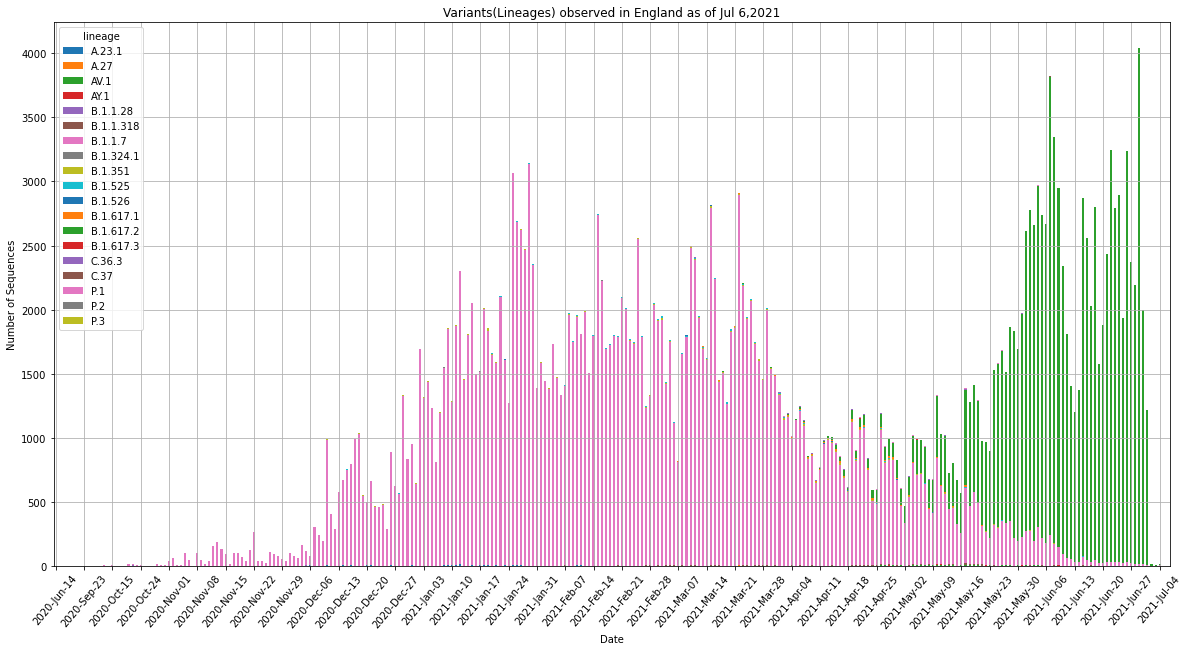

In [28]:
ax_1 = england_variants_pivotted.plot.bar(stacked=True, figsize=(20, 10), ylabel='Number of Sequences', xlabel='Date', title='Variants(Lineages) observed in England as of Jul 6,2021')
ax_1.xaxis.set_major_locator(ticker.FixedLocator(np.arange(0, len(england_variants_pivotted), 7)))
ax_1.xaxis.set_major_formatter(ticker.FixedFormatter(england_variants_pivotted.index[::7].strftime('%Y-%b-%d')))
plt.xticks(rotation =50)
plt.grid()

In [29]:
print(england_variants_pivotted['B.1.1.7'].max())
max_index_alpha = england_variants_pivotted['B.1.1.7'].idxmax()
print(max_index_alpha)

3131
2021-01-29 00:00:00


The peak of the Alpha Variant Distribution occurs on 29 Jan, 2021 with 3131 number of Sequences registered.

In [30]:
print(england_variants_pivotted['B.1.617.2'].max())
max_index_delta = england_variants_pivotted['B.1.617.2'].idxmax()
print(max_index_delta)

4023
2021-06-29 00:00:00


The peak of the Delta Variant Distribution occurs on 29 June, 2021 with 4023 number of Sequences registered. This is the global maximum of the distribution. The distribution has also several reasonable local maxima.

In [31]:
england_variants_pivotted.loc['2021-05-15']

lineage
A.23.1         0
A.27           0
AV.1           2
AY.1           0
B.1.1.28       0
B.1.1.318      0
B.1.1.7      322
B.1.324.1      0
B.1.351        1
B.1.525        1
B.1.526        0
B.1.617.1      1
B.1.617.2    339
B.1.617.3      0
C.36.3         0
C.37           0
P.1            0
P.2            0
P.3            0
Name: 2021-05-15 00:00:00, dtype: int64

The pivotted table of Variants gives us flexibility to easily compare the Sequences per Variant. In the middle of May, we observe the number of new Sequences for Alpha and Delta Lineages is comparable. This means that Delta started accelerating while Alpha decelerating. Other Variants can be completely ignored.

In [32]:
england_variants_pivotted.loc['2021-05-30']

lineage
A.23.1          1
A.27            0
AV.1            4
AY.1            1
B.1.1.28        0
B.1.1.318       0
B.1.1.7       185
B.1.324.1       0
B.1.351         0
B.1.525         0
B.1.526         0
B.1.617.1       3
B.1.617.2    1501
B.1.617.3       0
C.36.3          0
C.37            0
P.1             1
P.2             0
P.3             0
Name: 2021-05-30 00:00:00, dtype: int64

By the end of May, 2021, Delta beats Alpha with new Alpha Sequences comprising less than 15% of new Delta Sequences.

**General**:

The stacked bar distribution of the Variants (Lineages) shows prevalence of Alpha Variant from the very start of the pandemic in June 2020 up to the first days of May 2021. 
In the first days of May, Delta Variant overtakes Alpha leading the number of Sequences, and is still the prevaling Variant for today.

**Delta**:

Delta Variant was first detected in the mid-February 2021.
Delta Variant shows relatively gradual increase up to its first spike at the beginning of June. The next spike which is the global maximum of the Delta Variant distribution (as of 6 Jul, 2021) occurs on 29 Jun, 2021.
The future trend of Delta Variant is not yet deducible due to many dynamic factors among which are non-uniform speed of Vaccination across the country, not-yet established effectiveness of various vaccine types against Delta Variant, etc.

**Alpha**:

Alpha Variant shows relatively gradual increase in Number of Sequences from the date it emerged up until exhibiting its highest peaks in late January 2021 - early December 2021. 
The next significant spikes are observed in February and March. 
Starting in late March, Alpha Variant enters relatively gradual decrease and shows nearly extinguishing behavior in June 2021.  

Now, let us observe the following three intervals in more detail:

**Alpha Variant from the start till the maximum:**

lineage      A.23.1  A.27  AV.1  AY.1  B.1.1.28  B.1.1.318  B.1.1.7  \
sample_date                                                           
2020-06-14        0     0     0     0         0          0        1   
2020-06-22        0     0     0     0         1          0        0   
2020-08-30        0     0     0     0         1          0        0   
2020-09-03        0     0     0     0         1          0        0   
2020-09-04        0     0     0     0         1          0        0   
...             ...   ...   ...   ...       ...        ...      ...   
2021-01-25        6     0     0     0         0          3     3060   
2021-01-26        5     0     0     0         0          0     2675   
2021-01-27        3     0     0     0         0          0     2618   
2021-01-28        1     0     0     0         0          0     2464   
2021-01-29        1     1     0     0         0          0     3131   

lineage      B.1.324.1  B.1.351  B.1.525  B.1.526  B.1.617.1  B.1.617.2  \
s

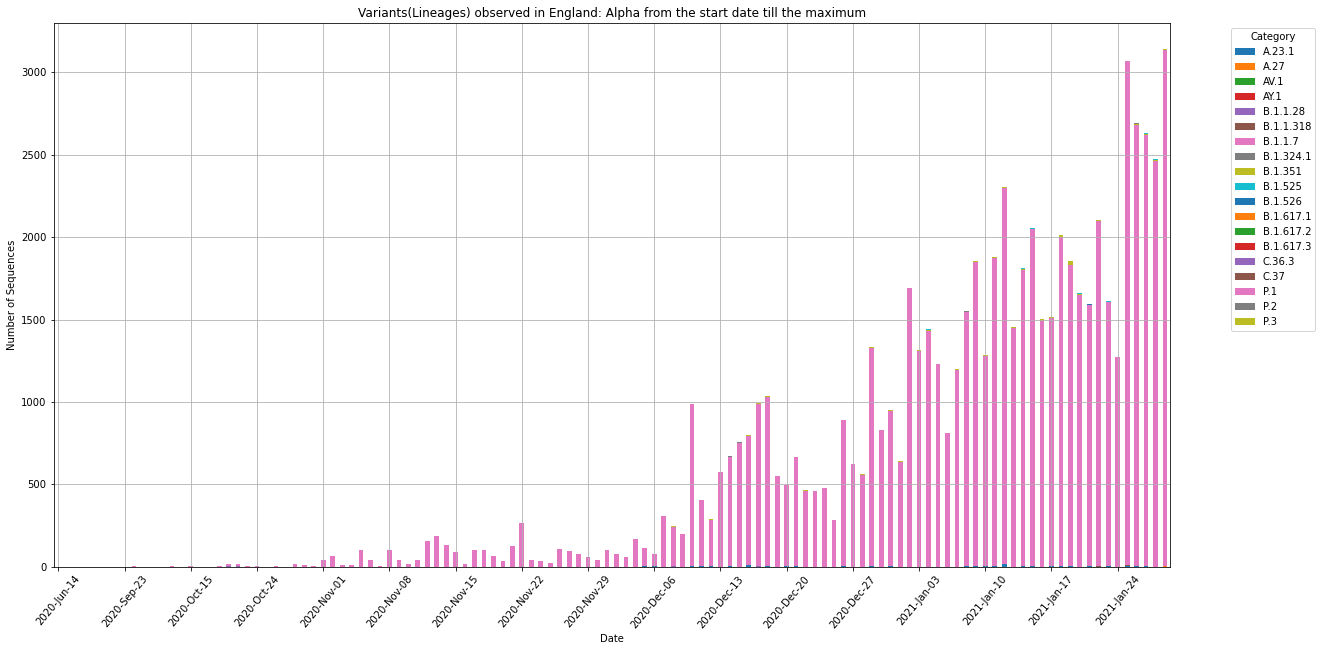

In [33]:
england_variants_pivotted_1 = england_variants_pivotted.loc['2020-06-14':'2021-01-29']
print(england_variants_pivotted_1)

ax_2 = england_variants_pivotted_1.plot.bar(stacked=True, figsize=(20, 10), ylabel='Number of Sequences', xlabel='Date', title='Variants(Lineages) observed in England: Alpha from the start date till the maximum')
ax_2.xaxis.set_major_locator(ticker.FixedLocator(np.arange(0, len(england_variants_pivotted_1), 7)))
ax_2.xaxis.set_major_formatter(ticker.FixedFormatter(england_variants_pivotted_1.index[::7].strftime('%Y-%b-%d')))
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation =50)
plt.grid()

**Alpha Variant from the maximum till Delta overtakes:**

Let us extract a period between January 10, 2021 and April 4, 2021 as between these dates Alpha Variant shows relatively similar behavior with the highest Number of Sequences observed on January 20, 2021. Other significant local maxima occur on January 16, February 6, February 16, March 6 and March 13. 

lineage      A.23.1  A.27  AV.1  AY.1  B.1.1.28  B.1.1.318  B.1.1.7  \
sample_date                                                           
2021-01-29        1     1     0     0         0          0     3131   
2021-01-30        0     0     0     0         0          0     2349   
2021-01-31        1     0     0     0         0          1     1384   
2021-02-01        0     0     0     0         0          1     1584   
2021-02-02        1     0     0     0         0          0     1439   
...             ...   ...   ...   ...       ...        ...      ...   
2021-05-11        0     0     8     3         0          3      610   
2021-05-12        0     0     5     0         0          4      555   
2021-05-13        0     0     7     3         0          2      431   
2021-05-14        0     0     7     1         0          5      442   
2021-05-15        0     0     2     0         0          0      322   

lineage      B.1.324.1  B.1.351  B.1.525  B.1.526  B.1.617.1  B.1.617.2  \
s

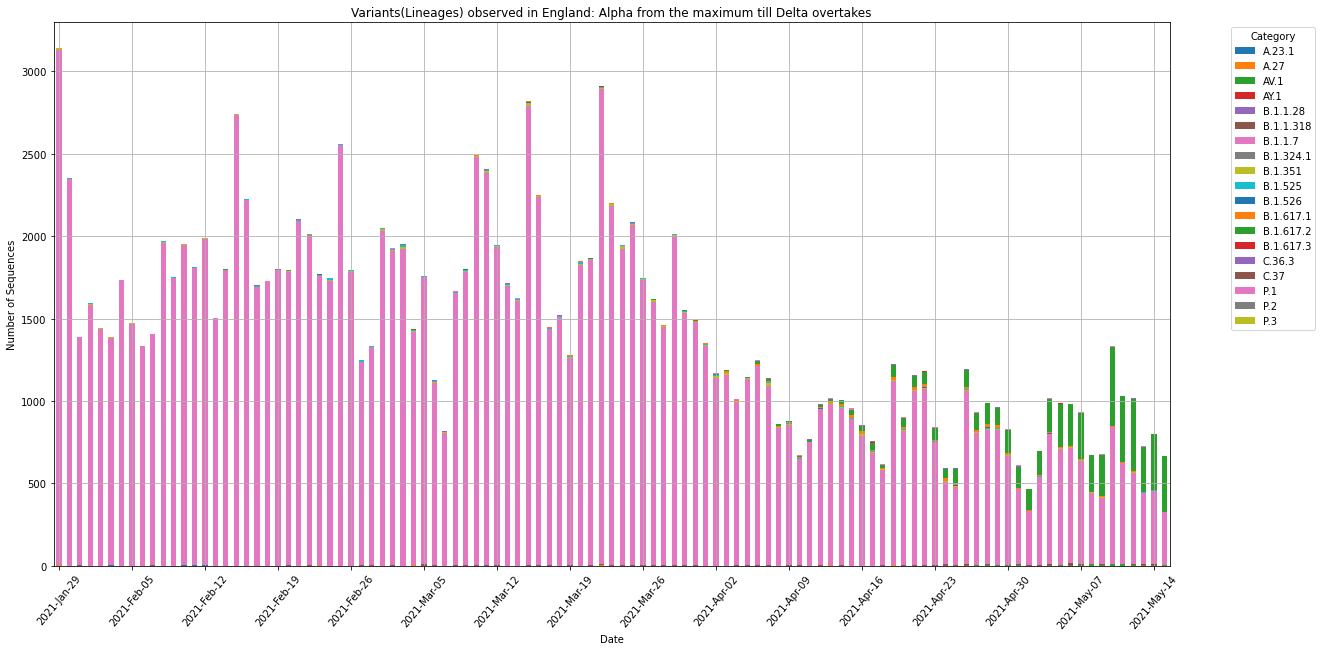

In [34]:
england_variants_pivotted_2 = england_variants_pivotted.loc['2021-01-29':'2021-05-15']
print(england_variants_pivotted_2)

ax_3 = england_variants_pivotted_2.plot.bar(stacked=True, figsize=(20, 10), ylabel='Number of Sequences', xlabel='Date', title='Variants(Lineages) observed in England: Alpha from the maximum till Delta overtakes')
ax_3.xaxis.set_major_locator(ticker.FixedLocator(np.arange(0, len(england_variants_pivotted_2), 7)))
ax_3.xaxis.set_major_formatter(ticker.FixedFormatter(england_variants_pivotted_2.index[::7].strftime('%Y-%b-%d')))
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation =50)
plt.grid()

**Delta Variant from the start till 6 Jul, 2021**

lineage      A.23.1  A.27  AV.1  AY.1  B.1.1.28  B.1.1.318  B.1.1.7  \
sample_date                                                           
2021-02-14        0     0     0     0         0          1     1794   
2021-02-15        0     0     0     0         0          0     2736   
2021-02-16        0     0     0     0         0          0     2221   
2021-02-17        1     0     0     0         0          0     1690   
2021-02-18        1     0     0     0         0          0     1725   
...             ...   ...   ...   ...       ...        ...      ...   
2021-07-02        0     0     0     0         0          0        0   
2021-07-03        0     0     0     0         0          0        0   
2021-07-04        0     0     0     0         0          0        7   
2021-07-05        0     0     0     0         0          0        0   
2021-07-06        0     0     0     0         0          0        0   

lineage      B.1.324.1  B.1.351  B.1.525  B.1.526  B.1.617.1  B.1.617.2  \
s

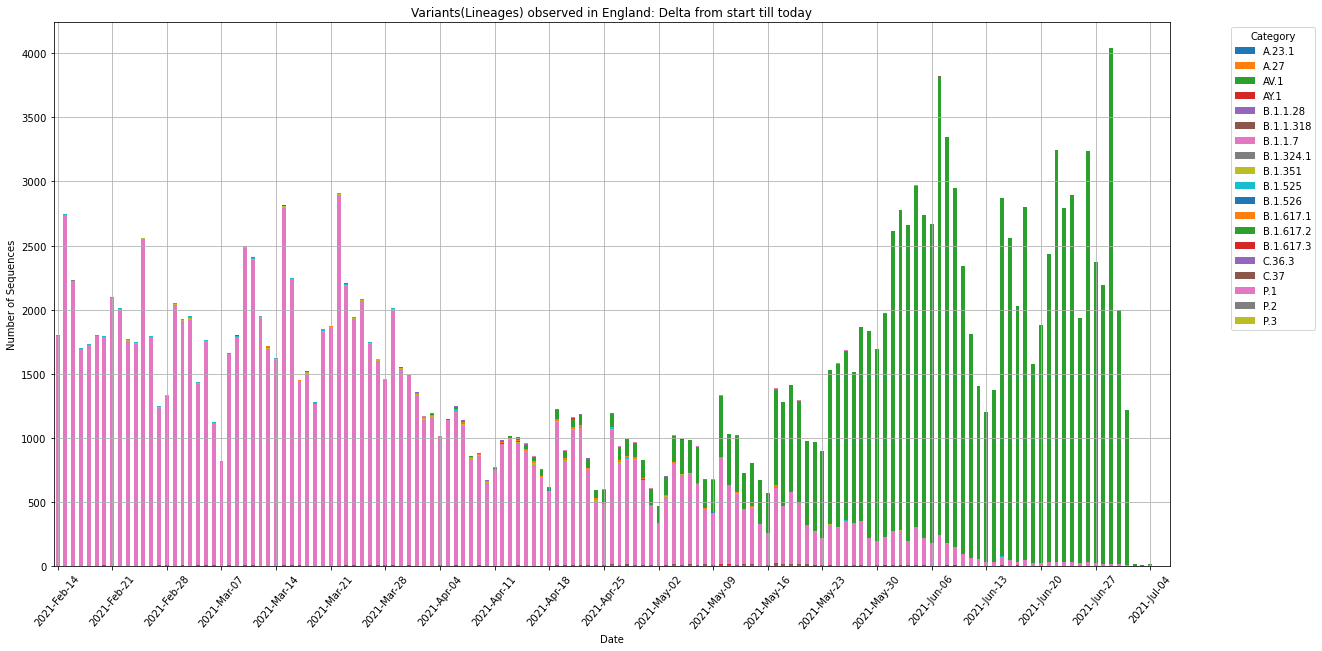

In [35]:
england_variants_pivotted_3 = england_variants_pivotted.loc['2021-02-14':'2021-07-10']
print(england_variants_pivotted_3)

ax_4 = england_variants_pivotted_3.plot.bar(stacked=True, figsize=(20, 10), ylabel='Number of Sequences', xlabel='Date', title='Variants(Lineages) observed in England: Delta from start till today')
ax_4.xaxis.set_major_locator(ticker.FixedLocator(np.arange(0, len(england_variants_pivotted_3), 7)))
ax_4.xaxis.set_major_formatter(ticker.FixedFormatter(england_variants_pivotted_3.index[::7].strftime('%Y-%b-%d')))
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation =50)
plt.grid()

For the sake of efficiency we will drop the columns corresponding to lineages other than B.1.1.7 and B.1.617.2. This way, we perform dimensionality reduction. 

In [36]:
england_variants_pivotted.drop(england_variants_pivotted.columns[[0,1,2,3,4,5,7,8,9,10,11,13,14,15,16,17,18]], axis = 1, inplace = True)
england_variants_pivotted

lineage,B.1.1.7,B.1.617.2
sample_date,,
2020-06-14,1,0
2020-06-22,0,0
2020-08-30,0,0
2020-09-03,0,0
2020-09-04,0,0
...,...,...
2021-07-02,0,11
2021-07-03,0,5
2021-07-04,7,11


In [37]:
england_variants_final = england_variants_pivotted.copy()
england_variants_final

lineage,B.1.1.7,B.1.617.2
sample_date,,
2020-06-14,1,0
2020-06-22,0,0
2020-08-30,0,0
2020-09-03,0,0
2020-09-04,0,0
...,...,...
2021-07-02,0,11
2021-07-03,0,5
2021-07-04,7,11


## 3. VACCINATIONS ANALYSIS

In [38]:
vaccinations = pd.read_csv('ENGLAND RAW DATASETS/VACCINATIONS_data_2021-Jul-11-2.csv')
vaccinations

,areaType,areaName,areaCode,date,newPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedFirstDoseByVaccinationDate,newPeopleVaccinatedSecondDoseByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate
0,nation,England,E92000001,2021-07-10,74837,38074168,170408.0,28893119.0
1,nation,England,E92000001,2021-07-09,72439,37999331,137868.0,28722711.0
2,nation,England,E92000001,2021-07-08,76995,37926892,131701.0,28584843.0
3,nation,England,E92000001,2021-07-07,67852,37849897,124235.0,28453142.0
4,nation,England,E92000001,2021-07-06,65344,37782045,105163.0,28328907.0
...,...,...,...,...,...,...,...,...
210,nation,England,E92000001,2020-12-12,10574,49730,NaN,NaN
211,nation,England,E92000001,2020-12-11,12474,39156,NaN,NaN
212,nation,England,E92000001,2020-12-10,11808,26682,NaN,NaN
213,nation,England,E92000001,2020-12-09,9580,14874,NaN,NaN


In [39]:
vaccinations = vaccinations.fillna(0)
vaccinations

,areaType,areaName,areaCode,date,newPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedFirstDoseByVaccinationDate,newPeopleVaccinatedSecondDoseByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate
0,nation,England,E92000001,2021-07-10,74837,38074168,170408.0,28893119.0
1,nation,England,E92000001,2021-07-09,72439,37999331,137868.0,28722711.0
2,nation,England,E92000001,2021-07-08,76995,37926892,131701.0,28584843.0
3,nation,England,E92000001,2021-07-07,67852,37849897,124235.0,28453142.0
4,nation,England,E92000001,2021-07-06,65344,37782045,105163.0,28328907.0
...,...,...,...,...,...,...,...,...
210,nation,England,E92000001,2020-12-12,10574,49730,0.0,0.0
211,nation,England,E92000001,2020-12-11,12474,39156,0.0,0.0
212,nation,England,E92000001,2020-12-10,11808,26682,0.0,0.0
213,nation,England,E92000001,2020-12-09,9580,14874,0.0,0.0


In [40]:
vaccinations['date'] = pd.to_datetime(vaccinations['date'])
vaccinations.dtypes

areaType                                                  object
areaName                                                  object
areaCode                                                  object
date                                              datetime64[ns]
newPeopleVaccinatedFirstDoseByVaccinationDate              int64
cumPeopleVaccinatedFirstDoseByVaccinationDate              int64
newPeopleVaccinatedSecondDoseByVaccinationDate           float64
cumPeopleVaccinatedSecondDoseByVaccinationDate           float64
dtype: object

In [41]:
vaccinations.drop(vaccinations.columns[[0,1,2]], axis = 1, inplace = True)
vaccinations_final = vaccinations.copy()
vaccinations_final

,date,newPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedFirstDoseByVaccinationDate,newPeopleVaccinatedSecondDoseByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate
0,2021-07-10,74837,38074168,170408.0,28893119.0
1,2021-07-09,72439,37999331,137868.0,28722711.0
2,2021-07-08,76995,37926892,131701.0,28584843.0
3,2021-07-07,67852,37849897,124235.0,28453142.0
4,2021-07-06,65344,37782045,105163.0,28328907.0
...,...,...,...,...,...
210,2020-12-12,10574,49730,0.0,0.0
211,2020-12-11,12474,39156,0.0,0.0
212,2020-12-10,11808,26682,0.0,0.0
213,2020-12-09,9580,14874,0.0,0.0


In [42]:
vaccinations.drop(labels=[0,1,2,3], axis = 0, inplace=True)
vaccinations_final = vaccinations.copy()
vaccinations_final

,date,newPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedFirstDoseByVaccinationDate,newPeopleVaccinatedSecondDoseByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate
4,2021-07-06,65344,37782045,105163.0,28328907.0
5,2021-07-05,56118,37716701,103801.0,28223744.0
6,2021-07-04,59401,37660583,85152.0,28119943.0
7,2021-07-03,117866,37601182,166703.0,28034791.0
8,2021-07-02,98204,37483316,135887.0,27868088.0
...,...,...,...,...,...
210,2020-12-12,10574,49730,0.0,0.0
211,2020-12-11,12474,39156,0.0,0.0
212,2020-12-10,11808,26682,0.0,0.0
213,2020-12-09,9580,14874,0.0,0.0


In [43]:
vaccinations_final = vaccinations_final.set_index('date')
vaccinations_final.head(3)

,newPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedFirstDoseByVaccinationDate,newPeopleVaccinatedSecondDoseByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate
date,,,,
2021-07-06,65344,37782045,105163.0,28328907.0
2021-07-05,56118,37716701,103801.0,28223744.0
2021-07-04,59401,37660583,85152.0,28119943.0


In [44]:
vaccinations_final = vaccinations_final.sort_values(by='date')
vaccinations_final

,newPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedFirstDoseByVaccinationDate,newPeopleVaccinatedSecondDoseByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate
date,,,,
2020-12-08,5294,5294,0.0,0.0
2020-12-09,9580,14874,0.0,0.0
2020-12-10,11808,26682,0.0,0.0
2020-12-11,12474,39156,0.0,0.0
2020-12-12,10574,49730,0.0,0.0
...,...,...,...,...
2021-07-02,98204,37483316,135887.0,27868088.0
2021-07-03,117866,37601182,166703.0,28034791.0
2021-07-04,59401,37660583,85152.0,28119943.0


In [45]:
print (vaccinations_final.index.min())
print (vaccinations_final.index.max())

2020-12-08 00:00:00
2021-07-06 00:00:00


First Dose Vaccination in England started on 8 Dec, 2020. 

Second Dose Vaccination batch started on 29 Dec, 2020, 3 weeks after the first dose. 

Cumulative number of people fully vaccinated (with the Second Dose) as of 6 Jul, 2021 is 28328907 (28+ million) which is 28328907  / 56550000 = 50% of England's population.

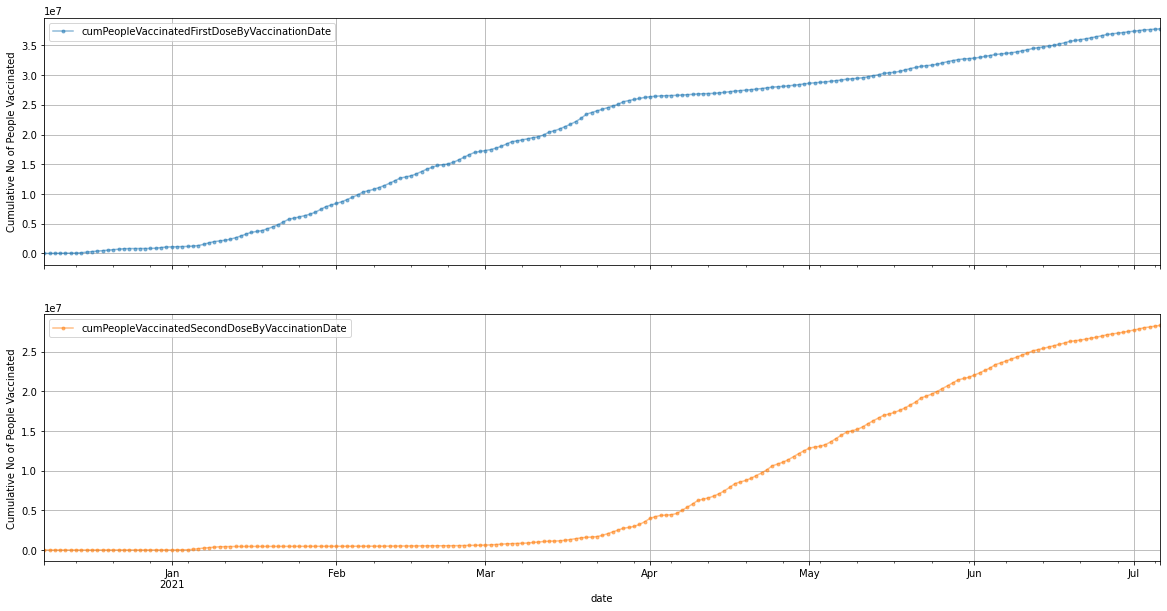

In [46]:
cols_plot = ['cumPeopleVaccinatedFirstDoseByVaccinationDate', 'cumPeopleVaccinatedSecondDoseByVaccinationDate']
axes = vaccinations_final[cols_plot].plot(marker='.', alpha=0.5, linestyle='-', figsize=(20, 10), subplots=True)

for ax in axes:
    ax.set_ylabel('Cumulative No of People Vaccinated')
    ax.grid()

(array([  0,   7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77,  84,
         91,  98, 105, 112, 119, 126, 133, 140, 147, 154, 161, 168, 175,
        182, 189, 196, 203, 210]),
 [Text(0, 0, '2020-12-08 00:00:00'),
  Text(1, 0, '2020-12-09 00:00:00'),
  Text(2, 0, '2020-12-10 00:00:00'),
  Text(3, 0, '2020-12-11 00:00:00'),
  Text(4, 0, '2020-12-12 00:00:00'),
  Text(5, 0, '2020-12-13 00:00:00'),
  Text(6, 0, '2020-12-14 00:00:00'),
  Text(7, 0, '2020-12-15 00:00:00'),
  Text(8, 0, '2020-12-16 00:00:00'),
  Text(9, 0, '2020-12-17 00:00:00'),
  Text(10, 0, '2020-12-18 00:00:00'),
  Text(11, 0, '2020-12-19 00:00:00'),
  Text(12, 0, '2020-12-20 00:00:00'),
  Text(13, 0, '2020-12-21 00:00:00'),
  Text(14, 0, '2020-12-22 00:00:00'),
  Text(15, 0, '2020-12-23 00:00:00'),
  Text(16, 0, '2020-12-24 00:00:00'),
  Text(17, 0, '2020-12-25 00:00:00'),
  Text(18, 0, '2020-12-26 00:00:00'),
  Text(19, 0, '2020-12-27 00:00:00'),
  Text(20, 0, '2020-12-28 00:00:00'),
  Text(21, 0, '2020-12-29 00:00

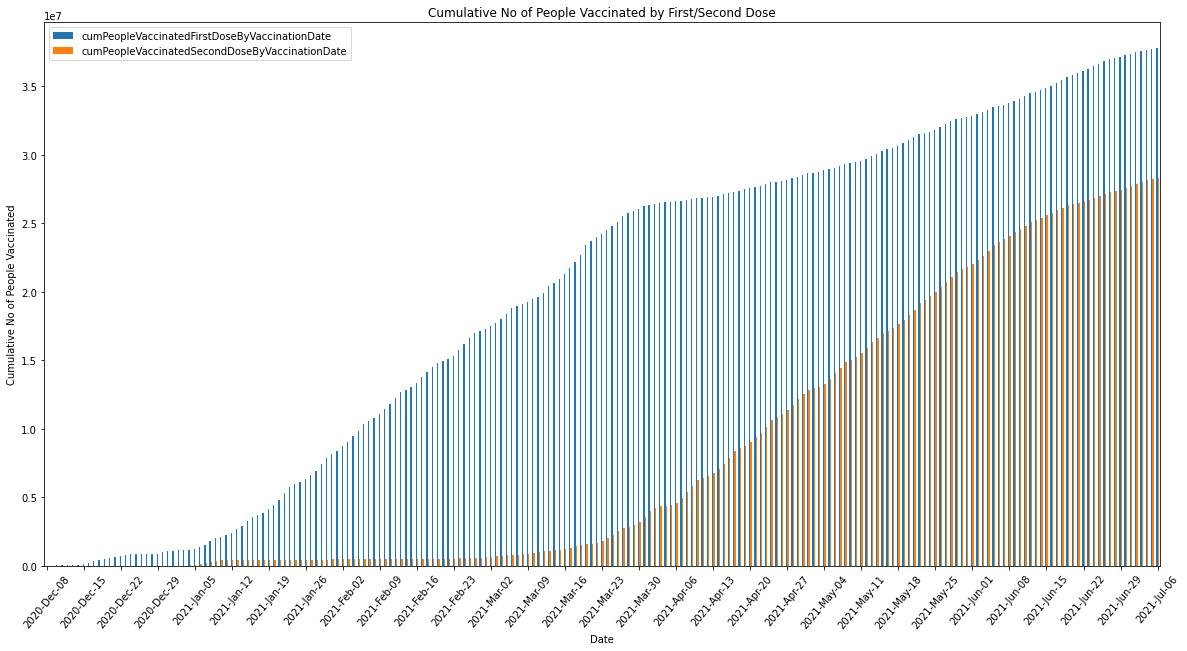

In [47]:
ax_5 = vaccinations_final[["cumPeopleVaccinatedFirstDoseByVaccinationDate", "cumPeopleVaccinatedSecondDoseByVaccinationDate"]].plot(kind="bar", figsize=(20, 10), xlabel = "Date", ylabel='Cumulative No of People Vaccinated', title='Cumulative No of People Vaccinated by First/Second Dose')
ax_5.xaxis.set_major_locator(ticker.FixedLocator(np.arange(0, len(vaccinations_final), 7)))
ax_5.xaxis.set_major_formatter(ticker.FixedFormatter(vaccinations_final.index[::7].strftime('%Y-%b-%d')))
plt.xticks(rotation =50)

## 4. CASES ANALYSIS

Data on Cases may seem identical to the Variants data, but it is not. It is neither deduplicated, nor Cases are assigned Variants. As such, Cases != Sequences.

In [48]:
cases = pd.read_csv('ENGLAND RAW DATASETS/CASES_data_2021-Jul-14-2.csv')
cases

,areaType,areaName,areaCode,date,newCasesBySpecimenDate,cumCasesBySpecimenDate
0,nation,England,E92000001,2021-07-13,10111,4550298
1,nation,England,E92000001,2021-07-12,34756,4540187
2,nation,England,E92000001,2021-07-11,26063,4505431
3,nation,England,E92000001,2021-07-10,24092,4479368
4,nation,England,E92000001,2021-07-09,28155,4455276
...,...,...,...,...,...,...
526,nation,England,E92000001,2020-02-03,0,2
527,nation,England,E92000001,2020-02-02,0,2
528,nation,England,E92000001,2020-02-01,0,2
529,nation,England,E92000001,2020-01-31,0,2


In [49]:
cases['date'] = pd.to_datetime(cases['date'])
cases.dtypes

areaType                          object
areaName                          object
areaCode                          object
date                      datetime64[ns]
newCasesBySpecimenDate             int64
cumCasesBySpecimenDate             int64
dtype: object

In [50]:
cases.drop(cases.columns[[0,1,2]], axis = 1, inplace=True)
cases_final = cases.copy()
cases_final

,date,newCasesBySpecimenDate,cumCasesBySpecimenDate
0,2021-07-13,10111,4550298
1,2021-07-12,34756,4540187
2,2021-07-11,26063,4505431
3,2021-07-10,24092,4479368
4,2021-07-09,28155,4455276
...,...,...,...
526,2020-02-03,0,2
527,2020-02-02,0,2
528,2020-02-01,0,2
529,2020-01-31,0,2


In [51]:
cases_final.head(10)

,date,newCasesBySpecimenDate,cumCasesBySpecimenDate
0,2021-07-13,10111,4550298
1,2021-07-12,34756,4540187
2,2021-07-11,26063,4505431
3,2021-07-10,24092,4479368
4,2021-07-09,28155,4455276
5,2021-07-08,29124,4427121
6,2021-07-07,33361,4397997
7,2021-07-06,30819,4364636
8,2021-07-05,29406,4333817
9,2021-07-04,21279,4304411


In [52]:
cases.drop(labels=[0,1,2,3,4,5,6], axis = 0, inplace=True)
cases_final = cases.copy()
cases_final

,date,newCasesBySpecimenDate,cumCasesBySpecimenDate
7,2021-07-06,30819,4364636
8,2021-07-05,29406,4333817
9,2021-07-04,21279,4304411
10,2021-07-03,20095,4283132
11,2021-07-02,21656,4263037
...,...,...,...
526,2020-02-03,0,2
527,2020-02-02,0,2
528,2020-02-01,0,2
529,2020-01-31,0,2


In [53]:
cases_final = cases_final.set_index('date')
cases_final.head(3)

,newCasesBySpecimenDate,cumCasesBySpecimenDate
date,,
2021-07-06,30819,4364636
2021-07-05,29406,4333817
2021-07-04,21279,4304411


In [54]:
cases_final = cases_final.sort_values(by='date')
cases_final

,newCasesBySpecimenDate,cumCasesBySpecimenDate
date,,
2020-01-30,2,2
2020-01-31,0,2
2020-02-01,0,2
2020-02-02,0,2
2020-02-03,0,2
...,...,...
2021-07-02,21656,4263037
2021-07-03,20095,4283132
2021-07-04,21279,4304411


In [55]:
print (cases_final.index.min())
print (cases_final.index.max())

2020-01-30 00:00:00
2021-07-06 00:00:00


(array([  0,   7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77,  84,
         91,  98, 105, 112, 119, 126, 133, 140, 147, 154, 161, 168, 175,
        182, 189, 196, 203, 210, 217, 224, 231, 238, 245, 252, 259, 266,
        273, 280, 287, 294, 301, 308, 315, 322, 329, 336, 343, 350, 357,
        364, 371, 378, 385, 392, 399, 406, 413, 420, 427, 434, 441, 448,
        455, 462, 469, 476, 483, 490, 497, 504, 511, 518]),
 [Text(0, 0, '2020-01-30 00:00:00'),
  Text(1, 0, '2020-01-31 00:00:00'),
  Text(2, 0, '2020-02-01 00:00:00'),
  Text(3, 0, '2020-02-02 00:00:00'),
  Text(4, 0, '2020-02-03 00:00:00'),
  Text(5, 0, '2020-02-04 00:00:00'),
  Text(6, 0, '2020-02-05 00:00:00'),
  Text(7, 0, '2020-02-06 00:00:00'),
  Text(8, 0, '2020-02-07 00:00:00'),
  Text(9, 0, '2020-02-08 00:00:00'),
  Text(10, 0, '2020-02-09 00:00:00'),
  Text(11, 0, '2020-02-10 00:00:00'),
  Text(12, 0, '2020-02-11 00:00:00'),
  Text(13, 0, '2020-02-12 00:00:00'),
  Text(14, 0, '2020-02-13 00:00:00'),
  Text(15, 0, '

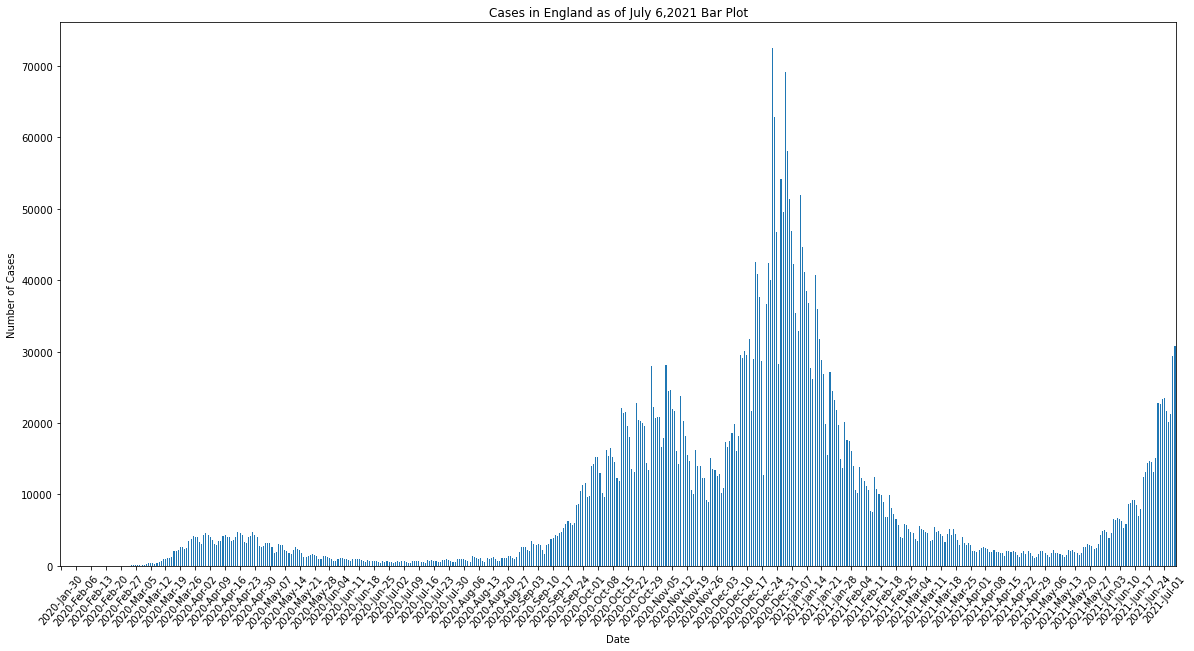

In [56]:
ax_6 = cases_final['newCasesBySpecimenDate'].plot.bar(figsize=(20, 10), ylabel='Number of Cases', xlabel='Date', title='Cases in England as of July 6,2021 Bar Plot')
ax_6.xaxis.set_major_locator(ticker.FixedLocator(np.arange(0, len(cases_final), 7)))
ax_6.xaxis.set_major_formatter(ticker.FixedFormatter(cases_final.index[::7].strftime('%Y-%b-%d')))
plt.xticks(rotation =50)

From the distribution of Cases we clearly see that it resembles the distribution of Variants. This was expected as data on Variants has been deduplicated. 

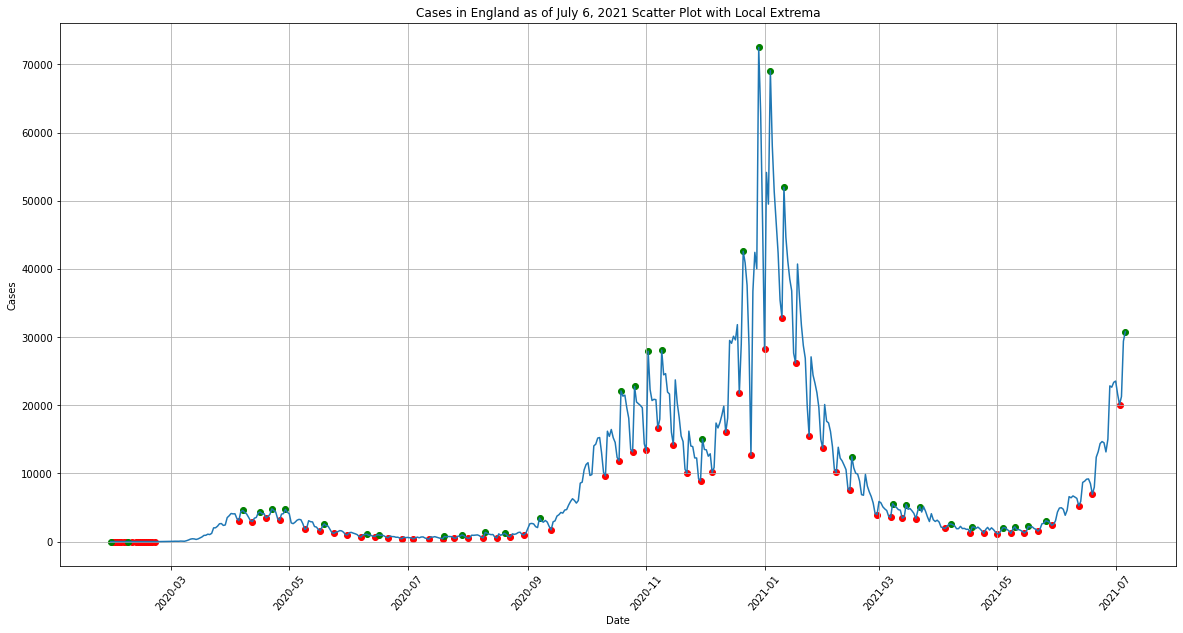

In [57]:
import numpy as np
from scipy.signal import argrelextrema

#Find local peaks
n=5
cases_final['min'] = cases_final.iloc[argrelextrema(cases_final.newCasesBySpecimenDate .values, np.less_equal,
                    order=n)[0]]['newCasesBySpecimenDate']
cases_final['max'] = cases_final.iloc[argrelextrema(cases_final.newCasesBySpecimenDate .values, np.greater_equal,
                    order=n)[0]]['newCasesBySpecimenDate']

#Plot results
plt.figure(figsize=(20, 10))
plt.scatter(cases_final.index, cases_final['min'], c='r')
plt.scatter(cases_final.index, cases_final['max'], c='g')
plt.plot(cases_final.index, cases_final['newCasesBySpecimenDate'])
plt.xticks(rotation =50)
plt.title('Cases in England as of July 6, 2021 Scatter Plot with Local Extrema')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.grid()

In [58]:
print(cases_final['newCasesBySpecimenDate'].max())
max_index_1 = cases_final['newCasesBySpecimenDate'].idxmax()
print(max_index_1)

72508
2020-12-29 00:00:00


In [59]:
cases_final

,newCasesBySpecimenDate,cumCasesBySpecimenDate,min,max
date,,,,
2020-01-30,2,2,NaN,2.0
2020-01-31,0,2,0.0,NaN
2020-02-01,0,2,0.0,NaN
2020-02-02,0,2,0.0,NaN
2020-02-03,0,2,0.0,NaN
...,...,...,...,...
2021-07-02,21656,4263037,NaN,NaN
2021-07-03,20095,4283132,20095.0,NaN
2021-07-04,21279,4304411,NaN,NaN


In [60]:
cases_final.drop(cases_final.columns[[2,3]],axis = 1, inplace = True)
cases_final

,newCasesBySpecimenDate,cumCasesBySpecimenDate
date,,
2020-01-30,2,2
2020-01-31,0,2
2020-02-01,0,2
2020-02-02,0,2
2020-02-03,0,2
...,...,...
2021-07-02,21656,4263037
2021-07-03,20095,4283132
2021-07-04,21279,4304411


## 5. DEATHS ANALYSIS

In [61]:
deaths = pd.read_csv('ENGLAND RAW DATASETS/DEATHS_data_2021-Jul-14-3.csv')
deaths

,areaType,areaName,areaCode,date,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate
0,nation,England,E92000001,2021-07-13,4,113018
1,nation,England,E92000001,2021-07-12,18,113014
2,nation,England,E92000001,2021-07-11,18,112996
3,nation,England,E92000001,2021-07-10,24,112978
4,nation,England,E92000001,2021-07-09,32,112954
...,...,...,...,...,...,...
494,nation,England,E92000001,2020-03-06,0,6
495,nation,England,E92000001,2020-03-05,3,6
496,nation,England,E92000001,2020-03-04,0,3
497,nation,England,E92000001,2020-03-03,2,3


In [62]:
deaths.drop(deaths.columns[[0,1,2]], axis = 1, inplace = True)
deaths_final = deaths.copy()
deaths_final

,date,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate
0,2021-07-13,4,113018
1,2021-07-12,18,113014
2,2021-07-11,18,112996
3,2021-07-10,24,112978
4,2021-07-09,32,112954
...,...,...,...
494,2020-03-06,0,6
495,2020-03-05,3,6
496,2020-03-04,0,3
497,2020-03-03,2,3


In [63]:
deaths_final.drop(labels=[0,1,2,3,4,5,6], axis = 0, inplace=True)
deaths_final = deaths_final.copy()
deaths_final

,date,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate
7,2021-07-06,17,112878
8,2021-07-05,20,112861
9,2021-07-04,19,112841
10,2021-07-03,24,112822
11,2021-07-02,23,112798
...,...,...,...
494,2020-03-06,0,6
495,2020-03-05,3,6
496,2020-03-04,0,3
497,2020-03-03,2,3


In [64]:
deaths_final.dtypes

date                          object
newDeaths28DaysByDeathDate     int64
cumDeaths28DaysByDeathDate     int64
dtype: object

In [65]:
deaths_final['date']=pd.to_datetime(deaths_final['date'])
deaths_final.dtypes

date                          datetime64[ns]
newDeaths28DaysByDeathDate             int64
cumDeaths28DaysByDeathDate             int64
dtype: object

In [66]:
deaths_final.nunique()

date                          492
newDeaths28DaysByDeathDate    271
cumDeaths28DaysByDeathDate    489
dtype: int64

In [67]:
type(deaths_final)

pandas.core.frame.DataFrame

In [68]:
deaths_final.isnull().any()

date                          False
newDeaths28DaysByDeathDate    False
cumDeaths28DaysByDeathDate    False
dtype: bool

In [69]:
deaths_final = deaths_final.set_index('date')
deaths_final

,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate
date,,
2021-07-06,17,112878
2021-07-05,20,112861
2021-07-04,19,112841
2021-07-03,24,112822
2021-07-02,23,112798
...,...,...
2020-03-06,0,6
2020-03-05,3,6
2020-03-04,0,3


## 6. MERGING VARIANTS, VACCINATIONS, CASES AND DEATHS 

In [70]:
england_variants_final

lineage,B.1.1.7,B.1.617.2
sample_date,,
2020-06-14,1,0
2020-06-22,0,0
2020-08-30,0,0
2020-09-03,0,0
2020-09-04,0,0
...,...,...
2021-07-02,0,11
2021-07-03,0,5
2021-07-04,7,11


In [71]:
vaccinations_final

,newPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedFirstDoseByVaccinationDate,newPeopleVaccinatedSecondDoseByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate
date,,,,
2020-12-08,5294,5294,0.0,0.0
2020-12-09,9580,14874,0.0,0.0
2020-12-10,11808,26682,0.0,0.0
2020-12-11,12474,39156,0.0,0.0
2020-12-12,10574,49730,0.0,0.0
...,...,...,...,...
2021-07-02,98204,37483316,135887.0,27868088.0
2021-07-03,117866,37601182,166703.0,28034791.0
2021-07-04,59401,37660583,85152.0,28119943.0


In [72]:
england_variants_final["cumPeopleVaccinatedFirstDoseByVaccinationDate"] = vaccinations_final["cumPeopleVaccinatedFirstDoseByVaccinationDate"]
england_variants_final["cumPeopleVaccinatedSecondDoseByVaccinationDate"] = vaccinations_final['cumPeopleVaccinatedSecondDoseByVaccinationDate']
england_variants_final

lineage,B.1.1.7,B.1.617.2,cumPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate
sample_date,,,,
2020-06-14,1,0,NaN,NaN
2020-06-22,0,0,NaN,NaN
2020-08-30,0,0,NaN,NaN
2020-09-03,0,0,NaN,NaN
2020-09-04,0,0,NaN,NaN
...,...,...,...,...
2021-07-02,0,11,37483316.0,27868088.0
2021-07-03,0,5,37601182.0,28034791.0
2021-07-04,7,11,37660583.0,28119943.0


In [73]:
cases_final

,newCasesBySpecimenDate,cumCasesBySpecimenDate
date,,
2020-01-30,2,2
2020-01-31,0,2
2020-02-01,0,2
2020-02-02,0,2
2020-02-03,0,2
...,...,...
2021-07-02,21656,4263037
2021-07-03,20095,4283132
2021-07-04,21279,4304411


In [74]:
deaths_final

,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate
date,,
2021-07-06,17,112878
2021-07-05,20,112861
2021-07-04,19,112841
2021-07-03,24,112822
2021-07-02,23,112798
...,...,...
2020-03-06,0,6
2020-03-05,3,6
2020-03-04,0,3


In [75]:
merged_cases_deaths = cases_final.join(deaths_final)
merged_cases_deaths

,newCasesBySpecimenDate,cumCasesBySpecimenDate,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate
date,,,,
2020-01-30,2,2,NaN,NaN
2020-01-31,0,2,NaN,NaN
2020-02-01,0,2,NaN,NaN
2020-02-02,0,2,NaN,NaN
2020-02-03,0,2,NaN,NaN
...,...,...,...,...
2021-07-02,21656,4263037,23.0,112798.0
2021-07-03,20095,4283132,24.0,112822.0
2021-07-04,21279,4304411,19.0,112841.0


In [76]:
final_dataset = merged_cases_deaths.join(england_variants_final)
final_dataset

,newCasesBySpecimenDate,cumCasesBySpecimenDate,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate,B.1.1.7,B.1.617.2,cumPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate
date,,,,,,,,
2020-01-30,2,2,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-31,0,2,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-01,0,2,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-02,0,2,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-03,0,2,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-07-02,21656,4263037,23.0,112798.0,0.0,11.0,37483316.0,27868088.0
2021-07-03,20095,4283132,24.0,112822.0,0.0,5.0,37601182.0,28034791.0
2021-07-04,21279,4304411,19.0,112841.0,7.0,11.0,37660583.0,28119943.0


In [77]:
final_dataset.loc['2020-06-14']

newCasesBySpecimenDate                               743.0
cumCasesBySpecimenDate                            232356.0
newDeaths28DaysByDeathDate                            76.0
cumDeaths28DaysByDeathDate                         35283.0
B.1.1.7                                                1.0
B.1.617.2                                              0.0
cumPeopleVaccinatedFirstDoseByVaccinationDate          NaN
cumPeopleVaccinatedSecondDoseByVaccinationDate         NaN
Name: 2020-06-14 00:00:00, dtype: float64

In [78]:
final_dataset.loc['2021-07-06']

newCasesBySpecimenDate                               30819.0
cumCasesBySpecimenDate                             4364636.0
newDeaths28DaysByDeathDate                              17.0
cumDeaths28DaysByDeathDate                          112878.0
B.1.1.7                                                  0.0
B.1.617.2                                                1.0
cumPeopleVaccinatedFirstDoseByVaccinationDate     37782045.0
cumPeopleVaccinatedSecondDoseByVaccinationDate    28328907.0
Name: 2021-07-06 00:00:00, dtype: float64

In [79]:
final_dataset = final_dataset.fillna(0)
final_dataset

,newCasesBySpecimenDate,cumCasesBySpecimenDate,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate,B.1.1.7,B.1.617.2,cumPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate
date,,,,,,,,
2020-01-30,2,2,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-31,0,2,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-01,0,2,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-02,0,2,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-03,0,2,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2021-07-02,21656,4263037,23.0,112798.0,0.0,11.0,37483316.0,27868088.0
2021-07-03,20095,4283132,24.0,112822.0,0.0,5.0,37601182.0,28034791.0
2021-07-04,21279,4304411,19.0,112841.0,7.0,11.0,37660583.0,28119943.0


**Normalization:**

As index increases and approaches 6 Jul, 2021, the values of the last two columns approach millions of times of the values of the Lineages columns. 

In case we further decide to construct Machine Learning models based on our final dataset, we will need to have our data to be normalized. Normalization improves model efficiency.

Data Normalization implies transforming numeric columns to a standard scale. In machine learning, some feature values differ from others multiple times. The features with higher values will dominate the learning process as is the case with our features.

We use the maximum absolute scaling normalization technique. The maximum absolute scaling rescales each feature between -1 and 1 by dividing every observation by its maximum absolute value.

In [80]:
for column in final_dataset.columns:
    final_dataset[column] = final_dataset[column]  / final_dataset[column].abs().max()
    
final_dataset

,newCasesBySpecimenDate,cumCasesBySpecimenDate,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate,B.1.1.7,B.1.617.2,cumPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate
date,,,,,,,,
2020-01-30,0.000028,4.582284e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-31,0.000000,4.582284e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-01,0.000000,4.582284e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-02,0.000000,4.582284e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-03,0.000000,4.582284e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2021-07-02,0.298670,9.767222e-01,0.018489,0.999291,0.000000,0.002734,0.992093,0.983733
2021-07-03,0.277142,9.813263e-01,0.019293,0.999504,0.000000,0.001243,0.995213,0.989618
2021-07-04,0.293471,9.862016e-01,0.015273,0.999672,0.002236,0.002734,0.996785,0.992624


**Notes regarding the final dataset:**

1. It contains Variants, Vaccinations, Cases and Deaths data for England from the start of the Covid-19 pandemic in England dated 30 Jan 2020, which essentially represents the first registered Covid-19 case in England. The data is valid as of 6 Jul 2021. The final date can be extended by updating the respective raw data taken from the mentioned sources. The flow of the analysis may change, with more / other Variants becoming dominant ones and/or extra Vaccination Doses taking place. 

2. Exploratory Data Analysis and Feature Engineering has been performed with missing values handled, insignificant features dropped and data normalized for possible further deployment.

3. Time Series Analysis has been carried out. The results and discussions will continue in the "Final Analysis" part.

In [81]:
final_dataset.to_csv(r'final_dataset.csv')

## 7. FINAL ANALYSIS

In [82]:
england_final_data = pd.read_csv('final_dataset.csv', index_col = 'date')
england_final_data

,newCasesBySpecimenDate,cumCasesBySpecimenDate,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate,B.1.1.7,B.1.617.2,cumPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate
date,,,,,,,,
2020-01-30,0.000028,4.582284e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-31,0.000000,4.582284e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-01,0.000000,4.582284e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-02,0.000000,4.582284e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-03,0.000000,4.582284e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2021-07-02,0.298670,9.767222e-01,0.018489,0.999291,0.000000,0.002734,0.992093,0.983733
2021-07-03,0.277142,9.813263e-01,0.019293,0.999504,0.000000,0.001243,0.995213,0.989618
2021-07-04,0.293471,9.862016e-01,0.015273,0.999672,0.002236,0.002734,0.996785,0.992624


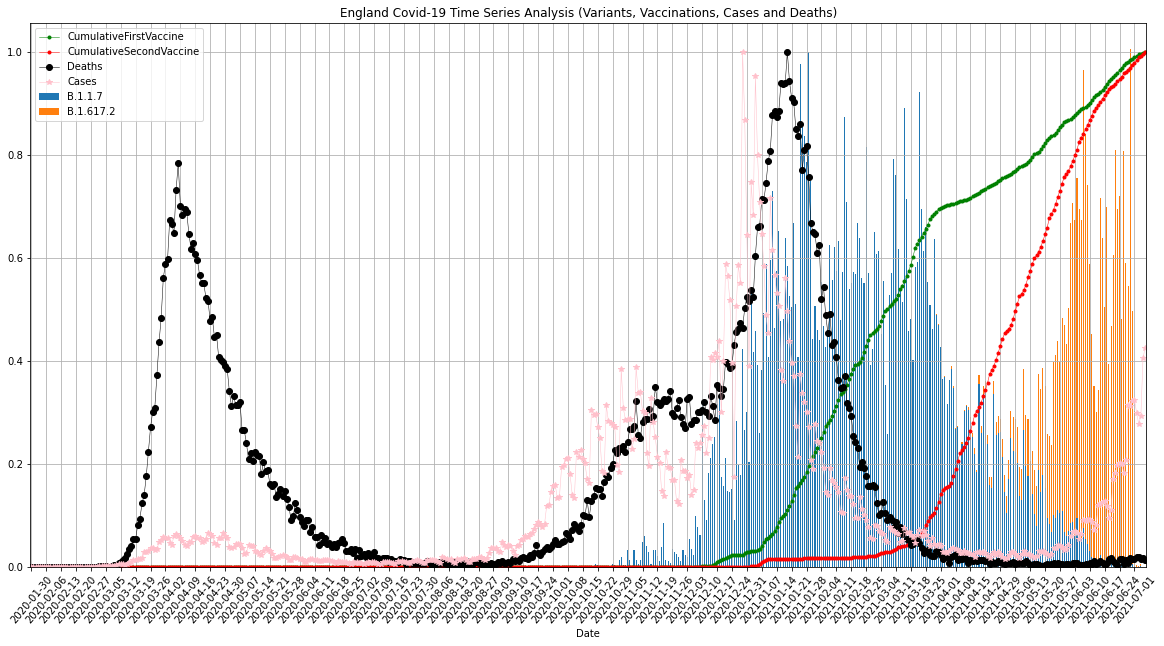

In [83]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(england_final_data["cumPeopleVaccinatedFirstDoseByVaccinationDate"], marker='.', linestyle='-', linewidth=0.5, label='CumulativeFirstVaccine', color='g')
ax.plot(england_final_data["cumPeopleVaccinatedSecondDoseByVaccinationDate"], marker='.', linestyle='-', linewidth=0.5, label='CumulativeSecondVaccine', color='r')
ax.plot(england_final_data["newDeaths28DaysByDeathDate"], marker='o', linestyle='-', linewidth=0.5, label='Deaths', color='black')
ax.plot(england_final_data["newCasesBySpecimenDate"], marker='*', linestyle='-', linewidth=0.5, label='Cases', color='pink')
plt.legend()
england_final_data.plot(kind='bar', stacked=True, y=['B.1.1.7','B.1.617.2'],ax=ax)
plt.grid()
plt.xticks(rotation =50)
ax.set_xlabel('Date')
ax.set_title('England Covid-19 Time Series Analysis (Variants, Vaccinations, Cases and Deaths)')
ax.xaxis.set_major_locator(ticker.FixedLocator(np.arange(0, len(england_final_data), 7)))

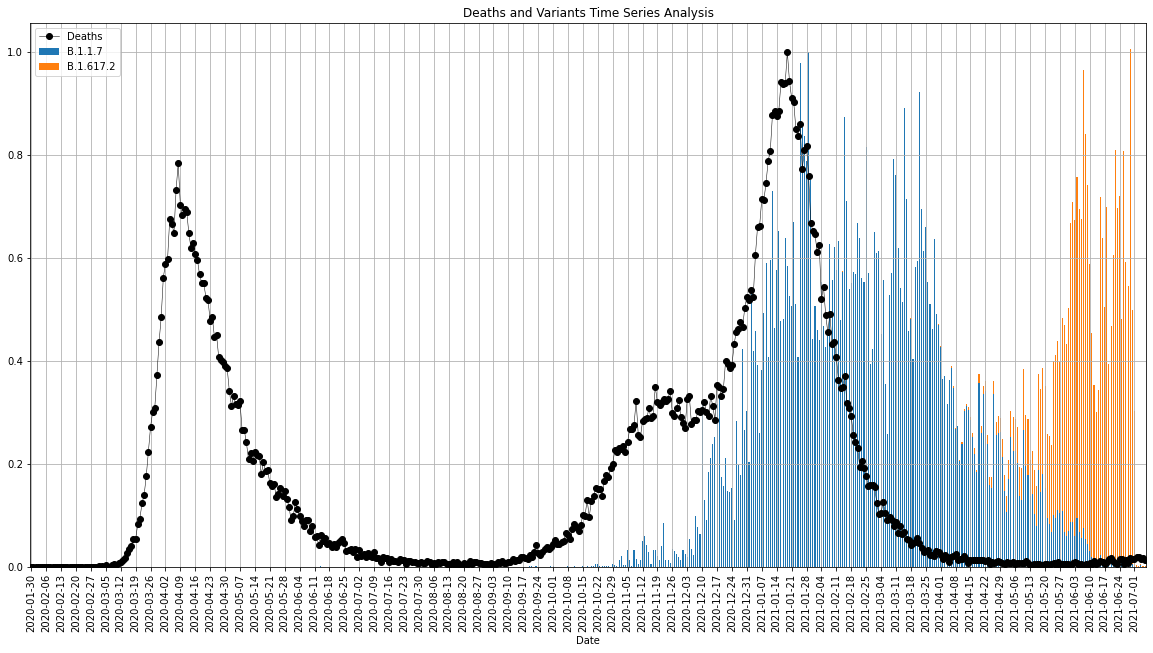

In [84]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(england_final_data["newDeaths28DaysByDeathDate"], marker='o', linestyle='-', linewidth=0.5, label='Deaths', color='black')
plt.legend()
plt.xticks(rotation =50)
england_final_data.plot(kind='bar', stacked=True, y=['B.1.1.7','B.1.617.2'],ax=ax)
plt.grid()
ax.set_xlabel('Date')
ax.set_title('Deaths and Variants Time Series Analysis')
ax.xaxis.set_major_locator(ticker.FixedLocator(np.arange(0, len(england_final_data), 7)))

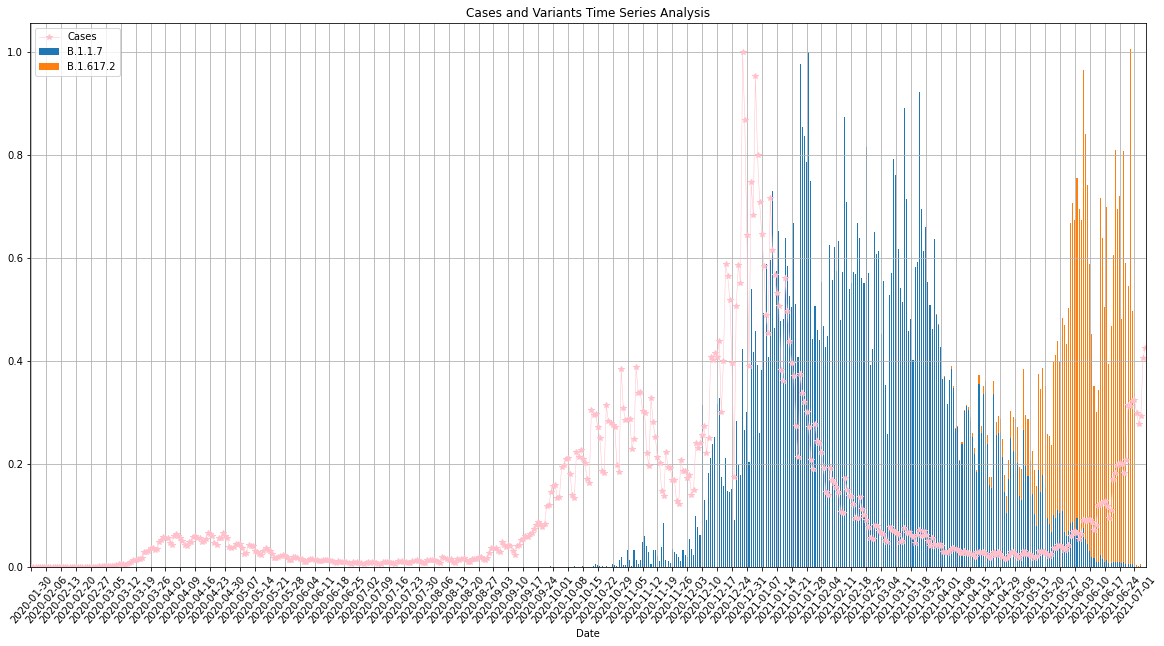

In [85]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(england_final_data["newCasesBySpecimenDate"], marker='*', linestyle='-', linewidth=0.5, label='Cases', color='pink')
england_final_data.plot(kind='bar', stacked=True, y=['B.1.1.7','B.1.617.2'],ax=ax)
plt.legend()
plt.grid()
plt.xticks(rotation =50)
ax.set_xlabel('Date')
ax.set_title('Cases and Variants Time Series Analysis')
ax.xaxis.set_major_locator(ticker.FixedLocator(np.arange(0, len(england_final_data), 7)))

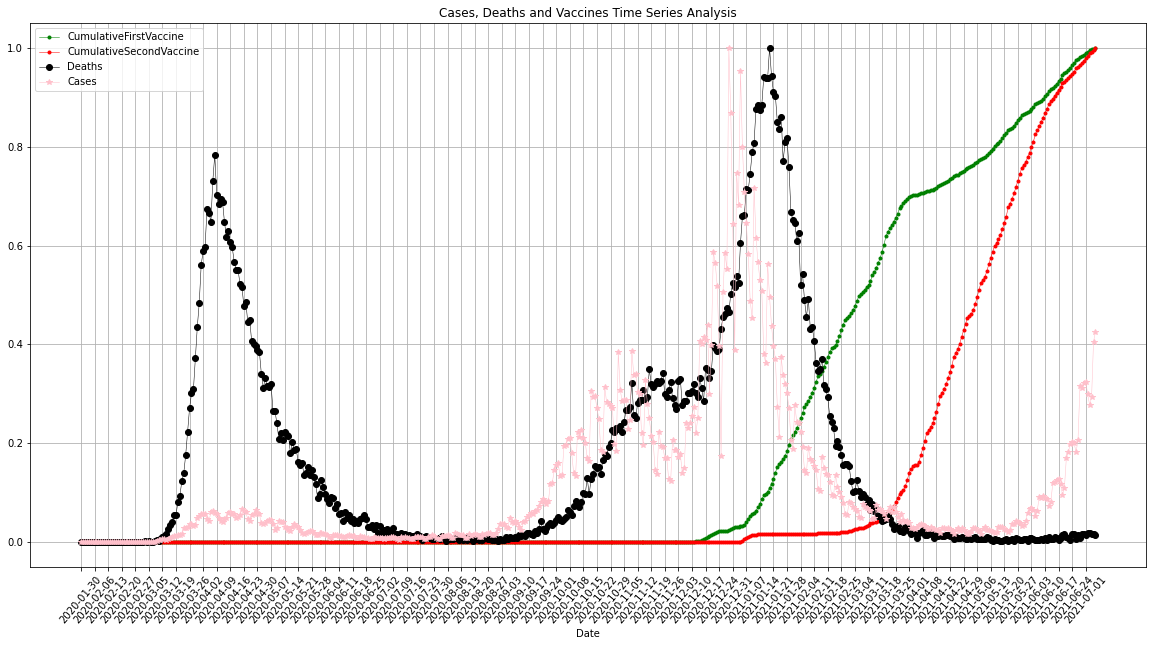

In [86]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(england_final_data["cumPeopleVaccinatedFirstDoseByVaccinationDate"], marker='.', linestyle='-', linewidth=0.5, label='CumulativeFirstVaccine', color='g')
ax.plot(england_final_data["cumPeopleVaccinatedSecondDoseByVaccinationDate"], marker='.', linestyle='-', linewidth=0.5, label='CumulativeSecondVaccine', color='r')
ax.plot(england_final_data["newDeaths28DaysByDeathDate"], marker='o', linestyle='-', linewidth=0.5, label='Deaths', color='black')
ax.plot(england_final_data["newCasesBySpecimenDate"], marker='*', linestyle='-', linewidth=0.5, label='Cases', color='pink')
plt.legend()
plt.grid()
plt.xticks(rotation =50)
ax.set_xlabel('Date')
ax.set_title('Cases, Deaths and Vaccines Time Series Analysis')
ax.xaxis.set_major_locator(ticker.FixedLocator(np.arange(0, len(england_final_data), 7)))

In [87]:
final_dataset_sample = england_final_data.loc['2021-02-14':'2021-07-10']
final_dataset_sample

,newCasesBySpecimenDate,cumCasesBySpecimenDate,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate,B.1.1.7,B.1.617.2,cumPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate
date,,,,,,,,
2021-02-14,0.103892,0.813921,0.349678,0.931678,0.572980,0.000249,0.340413,0.017332
2021-02-15,0.171926,0.816777,0.369775,0.935754,0.873842,0.000000,0.345723,0.017387
2021-02-16,0.149156,0.819255,0.317524,0.939253,0.709358,0.000000,0.353857,0.017501
2021-02-17,0.138233,0.821551,0.308682,0.942655,0.539764,0.000000,0.364885,0.017666
2021-02-18,0.136633,0.823821,0.292605,0.945880,0.550942,0.000000,0.375310,0.017836
...,...,...,...,...,...,...,...,...
2021-07-02,0.298670,0.976722,0.018489,0.999291,0.000000,0.002734,0.992093,0.983733
2021-07-03,0.277142,0.981326,0.019293,0.999504,0.000000,0.001243,0.995213,0.989618
2021-07-04,0.293471,0.986202,0.015273,0.999672,0.002236,0.002734,0.996785,0.992624


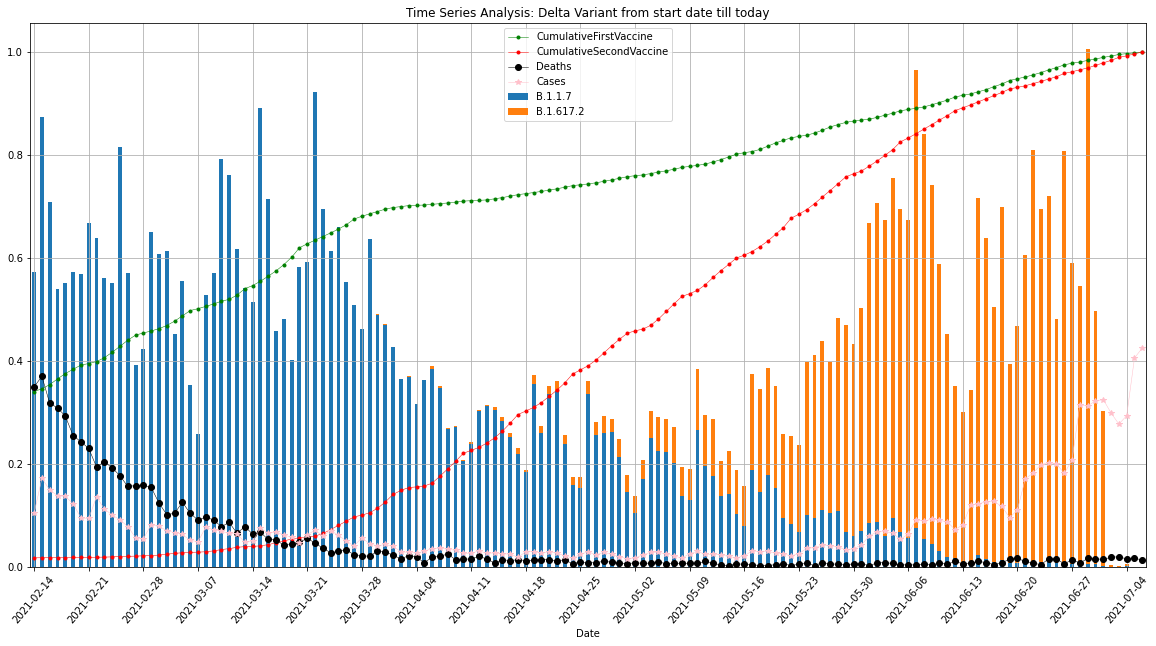

In [88]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(final_dataset_sample["cumPeopleVaccinatedFirstDoseByVaccinationDate"], marker='.', linestyle='-', linewidth=0.5, label='CumulativeFirstVaccine', color='g')
ax.plot(final_dataset_sample["cumPeopleVaccinatedSecondDoseByVaccinationDate"], marker='.', linestyle='-', linewidth=0.5, label='CumulativeSecondVaccine', color='r')
ax.plot(final_dataset_sample["newDeaths28DaysByDeathDate"], marker='o', linestyle='-', linewidth=0.5, label='Deaths', color='black')
ax.plot(final_dataset_sample["newCasesBySpecimenDate"], marker='*', linestyle='-', linewidth=0.5, label='Cases', color='pink')
plt.legend()
final_dataset_sample.plot(kind='bar', stacked=True, y=['B.1.1.7','B.1.617.2'],ax=ax)
plt.grid()
plt.xticks(rotation =50)
ax.set_xlabel('Date')
ax.set_title('Time Series Analysis: Delta Variant from start date till today')
ax.xaxis.set_major_locator(ticker.FixedLocator(np.arange(0, len(final_dataset_sample), 7)))

**Notes on Vaccinations:**

England’s vaccination program started on 2020-Dec-08. 3 weeks later on 2020-Dec-29, the first batch of 2281 people
were vaccinated with the Second Dose. Around 30% of population will yet be vaccinated with the First Dose as of July 6, 2021. Half of population is fully Vaccinated as of July 6, 2021.

**Notes on Variants vs. Vaccinations:**

The effect of Vaccination on the Alpha Variant is clearly observed. From 2021-Mar-22 on which is the date of the 3rd highest spike of Alpha, the distribution in 2 months was overtaken by Delta and approached 0. On 2021-Mar-22 the percentage of population administered with the first dose was 42%, while with the second dose population percentage was only 3%. It shows the definite efficiency of the vaccines against Alpha Variant even after the first dose. As of July 6 2021, 67% of the population has received the first dose and 50% of population has received the second dose and on this date the number of Alpha cases is 0. 

Despite extensive Vaccinations being administered across the country in the last months, the June Delta Variant spike is the fact. So, we can definitely say that the efficiency of the vaccines on Delta is lower than on Alpha despite around 50% of the population being vaccinated with the second dose in June. 

Though after 2021-Jun-29 which is the date of the distribution’s global maximum, the Delta Sequences went down, we can not project for sure the future Delta behavior to stay low or extinguish. As we have already pointed out before it may increase again, though not as dramatically as in June because of the fast and vast vaccination across England. As soon as the rest of the 50% gets fully vaccinated we should expect the Variant distribution approach 0, but it may take several months during which we may watch non-dramatic rises and falls in Delta Sequences behavior. Unless, another Variant overtakes Delta.

**Notes on Deaths:**

From the Deaths distribution we clearly observe two local maxima: in April 2020 when the virus newly started spreading out and in January 2021 when Alpha Variant was at its peak. 

After its global maximum on 2021-Jan-19, the Deaths distribution gradually decreases. We can argument this with the increasing first dose vaccinations and more extensive safety measures across the country. 

From April to June, the Deaths distribution exhibits still behavior, while by the end of June an increase in number of Deaths is observed. By the end of June, we observe that Delta overtakes Alpha, which should not be the reason for increase in Deaths. But there may be some possibility that the efficiency of Vaccines originally developed to counteract the Alpha Variant is not that high against Delta. The Delta Variant has been proved to be more severe than Alpha, and lower vaccine efficiency against Delta can be expected. 

We may expect the Deaths distribution to exhibit more or less similar behavior in the next months. If no new Variants develop and vaccination is complete across the country, we may hope for the Deaths distribution to gradually extinguish.

**Notes on Cases:**

The Cases Distribution is basically of the same shape as the Variants Distribution. The Variants distribution lags the Cases distribution as Variants represent Cumulative behavior, while Cases represent Daily Sequences. Remember that if the Variants data has not been deduplicated, it would be almost the same as the Cases data.

**Notes on Cases vs. Deahs**

Note that the Deaths Distribution's shape somewhat resembles the Cases Distribution. This is expectable because as the number of Cases gets higher, the number of Deaths increases as well. Only at the start of the pandemic when the world did not know what it was encountering and approved ways of fighting the virus were not yet developed the number of Deaths was strikingly high with the peak of the Deaths Distribution at the beginning of the pandemic aligned with the peak of the Cases Distribution. 

## 8. CONCLUSION

England Covid-19 analysis has been carried out with emphasis on Variants and Vaccinations. Effect of First and Second Dose Vaccinations on Delta and Alpha Variants as well as on Deaths has been discussed. While Alpha Variant is disappearing this is not yet the case for Delta, though it shows decrease in number of Sequences for the last weeks period. We may observe nondramatic rises and falls in Delta Sequences behavior in the future months with the June Delta spikes already behind, and not expected to repeat themselves due to the planned completion of vaccination across the country. Vaccination efficiency on Delta Variant will be more apparent as more people get fully vaccinated, though one yet unapproved study reveals the efficiency of Pfizer-BioNTech vaccine against Delta Variant as 33.5% for the First Dose and 87.9% for the Second Dose.